<h1 style='font-size:40px'> Applications</h1>

<h2 style='font-size:30px'> Preferential Attachment Model</h2>

<h3 style='font-size:30px;font-style:italic'> Degree Distributions</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Aprenderemos aqui a obter as distribuições dos degrees de uma rede.
        </li>
    </ul>
</div>

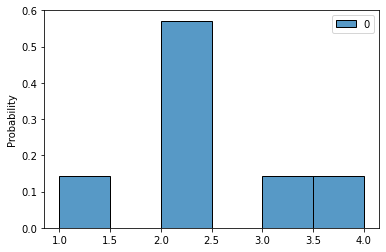

In [13]:
# Para obter os degrees de uma rede bidirecional, use o método 'degree'.
import networkx as nx
import seaborn as sns
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'D'), ('A', 'C'), ('C', 'D'), ('C', 'E'), ('E', 'F'), ('F', 'B'), ('G', 'A')])

# Plotando as distribuições de probabilidade dos degrees no seaborn.
sns.histplot(dict(G.degree()).values(), stat='probability');

In [14]:
# Obtendo os in-degrees de uma rede unidirecional.
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B','A'), ('A', 'C'), ('A', 'D'), ('C', 'E'), ('E', 'C'), ('D', 'B'), ('D', 'E')])

G.in_degree()

InDegreeView({'A': 1, 'B': 2, 'C': 2, 'D': 1, 'E': 2})

<center> 
    <h1> Distribuição de Degrees em Datasets Reais</h1>
    <img src='degree_distribution1.png'>
</center>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Quando aplicamos uma escala logarítmica, a distribuição parece adquirir a forma de uma linha reta. Distribuições dessa natureza tendem a respeitar a chamada <em> Power Law</em>, cuja fórmula é dada na imagem.
        </li>
        <li> 
            Observe que é comum haver pouquíssimos pontos com um degree elevado, enquanto que os demais, de uma maneira geral, apresentam uma baixa estatística.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Preferential Attachment Model</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            É considerando esse conjunto de características das redes reais que foi criado o Preferential Attachment Model. Esse propõe criar uma rede iterativamente. À cada ciclo, um novo nó deve ser adicionado; a probabilidade de que ele se conecte a qualquer outro ponto da rede é proporcional ao degree atual deste.
        </li>
        <li> 
            Conforme a rede cresce, a distribuição de degrees se aproxima à Power Law.
        </li>
    </ul>
</div>

<AxesSubplot:ylabel='Count'>

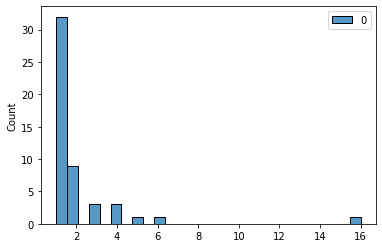

In [49]:
# Criando uma rede a partir do Preferential Attachment Model.
# O parâmetro 'n' sinaliza o número de nós final desejado.
# 'm' indica quantos edges cada novo nó terá.
G = nx.barabasi_albert_graph(50, 1, seed=42)
degrees = dict(G.degree()).values()

# Como é possível enxergar, a maior parte dos pontos tem baixo degree, enquanto um único caso isolado foi capaz de fazer 16 conexões.
sns.histplot(degrees)

<div> 
    <hr>
    <h2 style='font-size:30px'> Small World Networks</h2>
</div>

<h3 style='font-size:30px;font-style:italic'> Small World Model</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            O Small World Model é um modelo de geração de redes inspirado em estudos sobre distâncias entre nós. Esses descobriram que redes humanas tendem a possuir um alto Average Clustering Coefficient e um baixo Average Shortest Path (estamos mais próximos de qualquer outra pessoa do mundo do que imaginamos...).
        </li>
        <li> 
            Dessa maneira, o Small World Model almeja criar redes com essas propriedades.
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Funcionamento do Small World Model</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Um anel de N nós é inicializado, com cada ponto se ligando aos seus k vizinhos mais próximos.
        </li>
        <li> 
            Com uma probabilidade p, nós desfazemos os edges iniciais de cada ponto em troca de uma nova ligação com um nó aleatório da rede. Isso busca gerar as ligações triangulares, responsáveis por aumentar o Clustering Coefficient da rede.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Small World Model In NetworkX</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Use o método <em> nx.watts_strogatz_graph</em> para montar a sua rede Small-World. 'n' é a quantidade de nós; 'k' é o número de edges que cada ponto terá com os seus k vizinhos mais próximos; 'p' é a probabilidade de os edges iniciais se desfazerem.
        </li>
    </ul>
</div>

<AxesSubplot:ylabel='Probability'>

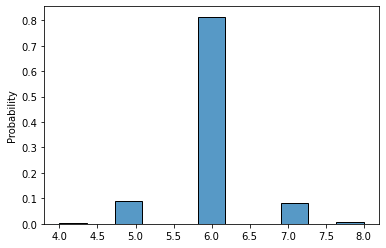

In [53]:
G = nx.watts_strogatz_graph(1000, 6, .04, seed=42)
degrees = dict(G.degree()).values()

# A distribuição de degrees se parece com uma Distribuição Gaussiana!
sns.histplot(list(degrees), stat='probability')

In [58]:
# Redes Small-World podem se tornar desconectadas por conta da eliminação dos edges iniciais. Tendo isso em vista
#, nx.connected_watts_strogatz_graph() busca criar esse tipo de rede, mas com o zelo de que essa seja conectada.

# Seu parâmetro 'tries'(no curso, 't') sinaliza quantas vezes nx.watts_strogatz_graph() será acionado até que uma rede conectada seja
# obtida.
G = nx.connected_watts_strogatz_graph(1000, 6, .04, tries=10, seed=42)

# A rede é conectada?
nx.is_connected(G)

True

<AxesSubplot:ylabel='Count'>

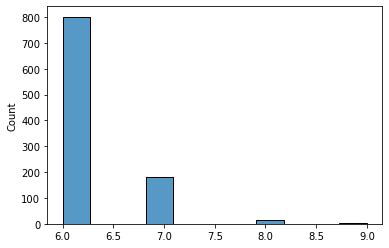

In [2]:
# 'nx.newman_watts_strogatz_graph()' é uma outra variação do modelo em que, para cada nó, os edges velhos são preservados e novos
# edges são formados com uma probabilidade 'p'.
import networkx as nx
import seaborn as sns
G = nx.newman_watts_strogatz_graph(1000, 6, .04, seed=42)

degrees = dict(G.degree()).values()

# Veja como agora não é possível haver nós com degree abaixo de 6, como foi o caso do último histograma feito.
sns.histplot(list(degrees))

<div> 
    <hr>
    <h2 style='font-size:30px'> Link Prediction</h2>
</div>

<div> 
    <ul style='font-size:20px'>
        <li> 
            Abordaremos algumas métricas que tentam prever a criação de novos edges, dada uma rede previamente formada.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Common Neighbors</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Common Neighbors faz a contagem de quantos pontos em comum um par de nós faz conexão.
        </li>
    </ul>
</div>

In [15]:
# Montando uma nova rede.
G = nx.watts_strogatz_graph(20, 2, .02, seed=42)

# Montando um dicionário que menciona pares não existentes na rede e a quantidade de vizinhos comuns entre cada par.
{(u,v) : len(sorted(nx.common_neighbors(G, u,v))) for u,v in sorted(nx.non_edges(G))}

{(0, 2): 1,
 (0, 3): 0,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 0,
 (0, 7): 0,
 (0, 8): 0,
 (0, 9): 0,
 (0, 10): 0,
 (0, 11): 0,
 (0, 12): 0,
 (0, 13): 0,
 (0, 14): 0,
 (0, 15): 0,
 (0, 16): 0,
 (0, 17): 0,
 (0, 18): 0,
 (0, 19): 0,
 (1, 3): 1,
 (1, 4): 0,
 (1, 5): 0,
 (1, 6): 0,
 (1, 7): 0,
 (1, 8): 0,
 (1, 9): 0,
 (1, 10): 0,
 (1, 11): 0,
 (1, 12): 0,
 (1, 13): 0,
 (1, 14): 0,
 (1, 15): 0,
 (1, 16): 0,
 (1, 17): 0,
 (1, 18): 0,
 (1, 19): 0,
 (2, 4): 1,
 (2, 5): 0,
 (2, 6): 0,
 (2, 7): 0,
 (2, 8): 0,
 (2, 9): 0,
 (2, 10): 0,
 (2, 11): 0,
 (2, 12): 0,
 (2, 13): 0,
 (2, 14): 0,
 (2, 15): 0,
 (2, 16): 0,
 (2, 17): 0,
 (2, 18): 0,
 (2, 19): 0,
 (3, 5): 1,
 (3, 6): 0,
 (3, 7): 0,
 (3, 8): 0,
 (3, 9): 0,
 (3, 10): 0,
 (3, 11): 0,
 (3, 12): 0,
 (3, 13): 0,
 (3, 14): 0,
 (3, 15): 0,
 (3, 16): 0,
 (3, 17): 0,
 (3, 18): 0,
 (3, 19): 0,
 (4, 6): 1,
 (4, 7): 0,
 (4, 8): 0,
 (4, 9): 0,
 (4, 10): 0,
 (4, 11): 0,
 (4, 12): 0,
 (4, 13): 0,
 (4, 14): 0,
 (4, 15): 0,
 (4, 16): 0,
 (4, 17): 0,
 (4, 18): 0,
 (4

<h3 style='font-size:30px;font-style:italic'> Jaccard Coefficient</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            O Jaccard Coefficient mede a quantidade de vizinhos em comum, mas divide esse valor pelo número de total de nós com os quais os pares se conectam (os vizinhos em comum são contados apenas uma vez, e não duas).
        </li>
    </ul>
</div>

In [20]:
# O resultado final de 'jaccard_coefficient' é uma tupla (nó1, nó2, jaccard_coefficient) que menciona todos os pares não formados de nós 
from operator import itemgetter
sorted(nx.jaccard_coefficient(G), key=itemgetter(2), reverse=True)[:5]

[(0, 2, 0.5),
 (1, 3, 0.3333333333333333),
 (2, 4, 0.3333333333333333),
 (4, 6, 0.3333333333333333),
 (4, 19, 0.3333333333333333)]

<h3 style='font-size:30px;font-style:italic'> Resource Allocation</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Essa métrica penaliza pares de nós cujos vizinhos tenham degrees elevados. Consiste na soma de 1 dividido pelo degree de cada nó intermediário.
        </li>
    </ul>
</div>
<center> 
    <img src='jaccard1.png'> 
</center>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Observe que ambos os nós intermediários entre A e C possuem um degree 3. Portanto, a Resource Allocation entre A e C será de $\frac{1}{3}+\frac{1}{3}=\frac{2}{3}$.
        </li>
    </ul>
</div>

In [23]:
sorted(nx.resource_allocation_index(G), key=itemgetter(2), reverse=True)[:5]

[(0, 2, 0.5), (1, 3, 0.5), (2, 4, 0.5), (3, 5, 0.5), (5, 7, 0.5)]

In [17]:
! mv /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-08-07\ at\ 14.10.33.png ./degree_distribution1.png

<p style='color:red'> Link Prediction (8:30)